El consultor pasado creó el gráfico ilustrado en la siguiente imagen:

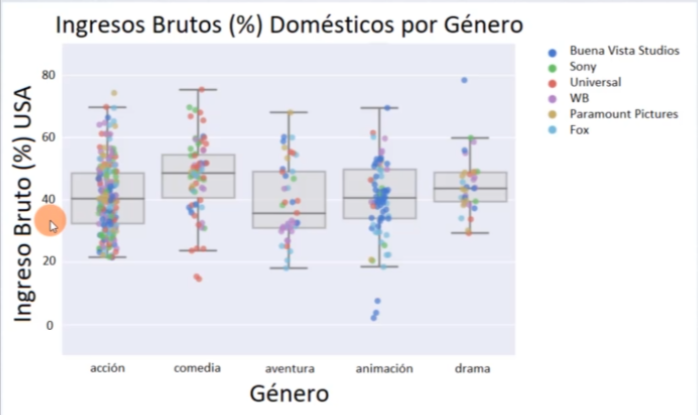
    
Sin embargo, el código de Python que se usaba para crearlo se ha perdido y no se ha podido encontrar. 
Tu trabajo es codificar un script que recree el mismo gráfico y que se vea lo más parecido a este.

Te han dado un nuevo ser de `Datos.csv`.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
# Importa los datos
peliculas = pd.read_csv('Datos.csv' , encoding = 'latin1')

In [25]:

# Revisa la estructura del DataFrame
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Dia de la Semana                          608 non-null    object 
 1   Director                                  608 non-null    object 
 2   Genero                                    608 non-null    object 
 3   Pelicula                                  608 non-null    object 
 4   Dia Lanzamiento                           608 non-null    object 
 5   Estudio                                   608 non-null    object 
 6   Ingreso Bruto Ajustado ($mill)            608 non-null    object 
 7   Presupuesto ($mill)                       608 non-null    float64
 8   Ingreso Bruto ($mill)                     608 non-null    object 
 9   Rating IMDB                               608 non-null    float64
 10  Rating MovieLens                      

In [26]:
# Revisa el resumen del DataFrame
peliculas.describe()

,Presupuesto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos %,Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [27]:
# Explora los datos
peliculas.head()

,Dia de la Semana,Director,Genero,Pelicula,Dia Lanzamiento,Estudio,Ingreso Bruto Ajustado ($mill),Presupuesto ($mill),Ingreso Bruto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos ($mill),Ingresos Fuera de Estados Unidos %,Utilidad ($mill),Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
0,Friday,Brad Bird,accion,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,accion,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,accion,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedia,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,accion,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [28]:
peliculas.Estudio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [29]:
len(peliculas.Estudio.unique())

36

In [30]:
len(peliculas.Genero.unique())

15

In [31]:
# Filtra el DataFrame por Género
peliculas2 = peliculas[(peliculas.Genero == 'comedia') | (peliculas.Genero == 'accion')]
peliculas2.head()

,Dia de la Semana,Director,Genero,Pelicula,Dia Lanzamiento,Estudio,Ingreso Bruto Ajustado ($mill),Presupuesto ($mill),Ingreso Bruto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos ($mill),Ingresos Fuera de Estados Unidos %,Utilidad ($mill),Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
0,Friday,Brad Bird,accion,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,accion,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,accion,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedia,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,accion,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [32]:
peliculas2.Genero.unique()

array(['accion', 'comedia'], dtype=object)

In [33]:
filtro_generos = ['accion', 'aventura', 'animacion', 'comedia', 'drama']
peliculas2 = peliculas[peliculas.Genero.isin(filtro_generos)]
peliculas2.head(10)

,Dia de la Semana,Director,Genero,Pelicula,Dia Lanzamiento,Estudio,Ingreso Bruto Ajustado ($mill),Presupuesto ($mill),Ingreso Bruto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos ($mill),Ingresos Fuera de Estados Unidos %,Utilidad ($mill),Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
0,Friday,Brad Bird,accion,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,accion,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,accion,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedia,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,accion,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,accion,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,aventura,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,accion,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,accion,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animacion,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7


In [34]:
peliculas2.Genero.unique()

array(['accion', 'comedia', 'aventura', 'animacion', 'drama'],
      dtype=object)

In [35]:
filtro_estudios = ['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'WB', 'Universal', 'Sony']
peliculas3 = peliculas2[peliculas2.Estudio.isin(filtro_estudios)]
peliculas3.head(10)

,Dia de la Semana,Director,Genero,Pelicula,Dia Lanzamiento,Estudio,Ingreso Bruto Ajustado ($mill),Presupuesto ($mill),Ingreso Bruto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos ($mill),Ingresos Fuera de Estados Unidos %,Utilidad ($mill),Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
0,Friday,Brad Bird,accion,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,accion,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedia,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,accion,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,accion,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,aventura,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,accion,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,accion,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animacion,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
14,Friday,Ryan Murphy,drama,Eat Pray Love,13/08/2010,Sony,223.1,60.0,204.6,5.6,2.84,124,60.6,144.6,241.0,133,80.6,39.4


In [36]:
peliculas3.Estudio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [37]:
peliculas3.Genero.unique()

array(['accion', 'comedia', 'aventura', 'animacion', 'drama'],
      dtype=object)

In [38]:
len(peliculas3)

423

---


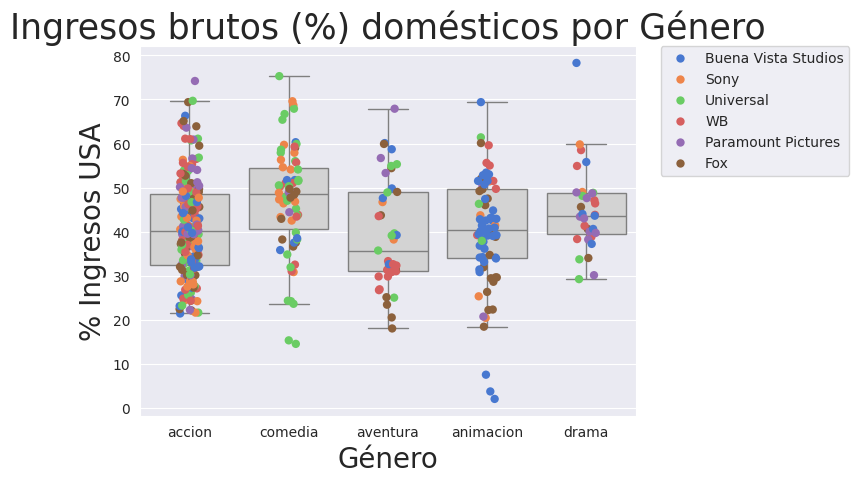

In [39]:
# Establece el estilo de fondo y las líneas de cuadrícula del gráfico en "darkgrid" (cuadrícula sobre fondo oscuro)
sns.set_style("darkgrid")

# Define la paleta de colores utilizada para los gráficos como "muted" (colores apagados y suaves)
sns.set_palette("muted")

# Crea un diagrama de caja y bigote (boxplot) para visualizar la distribución de los ingresos porcentuales por género
# Parámetros:
# - data: conjunto de datos 'peliculas3'
# - x: variable categórica 'Genero'
# - y: variable numérica 'Ingresos % USA'
# - orient: orientación vertical del gráfico
# - color: color gris claro para el boxplot
# - showfliers: oculta los valores atípicos (outliers) del boxplot
ax = sns.boxplot(data=peliculas3, 
                 x='Genero', 
                 y ='Ingresos % USA', 
                 orient='v', 
                 color='lightgray', 
                 showfliers=False)

# Ajusta la transparencia (alpha) de las cajas del boxplot a un 50%
plt.setp(ax.artists, alpha=0.5)

# Superpone un gráfico de puntos (stripplot) sobre el boxplot para mostrar cada punto de datos individuales
# Parámetros:
# - jitter: añade ruido aleatorio en el eje horizontal para evitar la superposición de puntos
# - size: tamaño de los puntos
# - linewidth: sin borde en los puntos
# - hue: color de los puntos determinado por la variable categórica 'Estudio'
sns.stripplot(data=peliculas3, 
              x='Genero', 
              y ='Ingresos % USA', 
              jitter=True,
              size=6, 
              linewidth=0, 
              hue='Estudio')

# Establece el título del gráfico con un tamaño de fuente grande (25)
ax.axes.set_title('Ingresos brutos (%) domésticos por Género', fontsize=25)

# Etiqueta del eje X (Género) con un tamaño de fuente grande (20)
ax.set_xlabel('Género', fontsize=20)

# Etiqueta del eje Y (% Ingresos USA) con un tamaño de fuente grande (20)
ax.set_ylabel('% Ingresos USA', fontsize=20)

# Añade una leyenda al gráfico, fuera del área del gráfico (a la derecha), con el ancla en la posición especificada
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Muestra el gráfico generado con todos los elementos configurados
plt.show()
